# Realce de Imagens

Nesse tutorial vamos trabalhar os primeiros métodos que permitem melhorar a qualidade de uma imagem. 

## Histograma

In [27]:
# Import necessários

# Importando os pacotes necessários
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from matplotlib.pyplot import imshow
from scipy.misc.pilutil import Image
from skimage import data, io

# Força ao matplot plotar as imagens no Jupyter Notebook
%matplotlib inline

In [2]:
# A função a seguir retorna o histograma de uma imagem

def get_histogram(imagem, limite_cinza):
    
    array= imagem.flatten()
    
    hist = np.zeros(limite_cinza, dtype='int')
    
    for i in range(0, len(array)):
        hist[array[i]] += 1
        
    return hist    

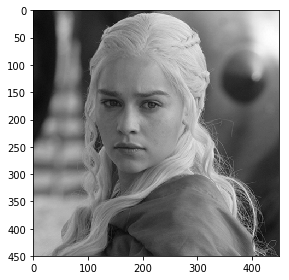

In [29]:
# Carregando a imagem
gray_image = Image.open('../images/daenarys_color.jpg').convert("L")
gray_image = np.asarray(gray_image)

# Exibindo uma imagem em preto e branco
io.imshow(gray_image)

In [30]:
histogram = get_histogram(gray_image, 256)

print(histogram)

[   0    0    0    2    0    1    1    1    2   14   28   86  100  177
  319  584  770  952  887  810  712  701  538  547  503  428  324  367
  401  455  426  430  433  464  573  622  722  831  897 1092 1317 1315
 1344 1337 1211  986  879  814  799  768  659  672  596  586  615  660
  688  766  840  883  800  793  905  908  932  936  890  883  892  945
  975 1116 1093  992 1028 1023 1155 1126 1180 1226 1165 1145 1109 1016
 1006  974 1057 1051 1187 1121 1138 1205 1180 1171 1139 1082 1062 1091
 1083 1079 1159 1182 1201 1197 1263 1362 1372 1465 1514 1476 1480 1606
 1537 1415 1498 1550 1464 1477 1424 1435 1476 1444 1351 1383 1409 1337
 1332 1466 1449 1398 1381 1433 1374 1429 1421 1397 1422 1402 1410 1314
 1451 1363 1379 1324 1289 1281 1212 1287 1184 1216 1153 1199 1110 1172
 1136 1146 1180 1140 1180 1172 1110 1077 1048 1058  947  874  887  888
  912  925  905  961 1017  993  982  970  948 1002 1029 1109 1116 1009
  960  870  922  786  735  695  669  555  539  581  552  567  541  550
  552 

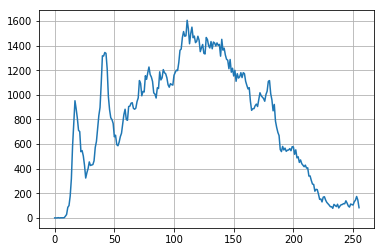

In [31]:
plt.grid(True)

x = range(len(histogram))
y = histogram

plt.plot(x, y)

### Aplicando a Função de Histograma

Vamos aplicar a geração de histograma às imagens: **daenarys_claro.jpeg**, **daenarys_contraste.jpg** e **daenarys_escuro.jpeg**. 

## Daenarys Claro

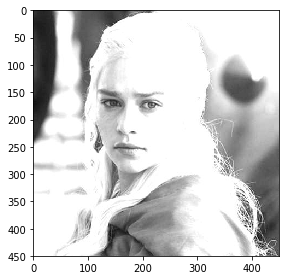

In [32]:
# Carregando a imagem
img_claro = Image.open('../images/histograma/daenarys_claro.jpeg')
img_claro = np.asarray(img_claro)
io.imshow(img_claro)

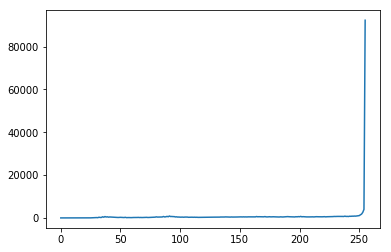

In [33]:
histogram = get_histogram(img_claro, 256)

x = range(len(histogram))
y = histogram

plt.plot(x, y)

## Daenarys Contraste

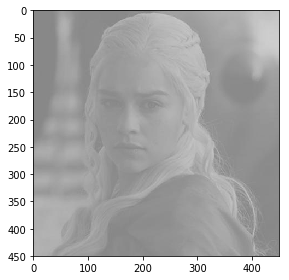

In [35]:
# Carregando a imagem
img_contraste = Image.open('../images/histograma/daenarys_contraste.jpg')
img_contraste = np.asarray(img_contraste)
io.imshow(img_contraste)

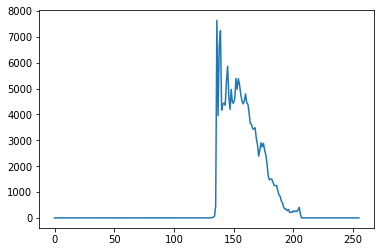

In [36]:
histogram = get_histogram(img_contraste, 256)

x = range(len(histogram))
y = histogram

plt.plot(x, y)

#### Daenarys Escuro

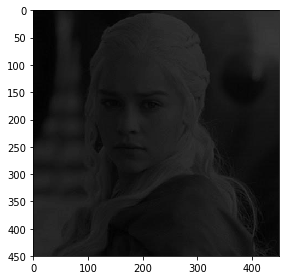

In [37]:
# Carregando a imagem
img_escuro = Image.open('../images/histograma/daenarys_escuro.jpeg')
img_escuro = np.asarray(img_escuro)
io.imshow(img_escuro)

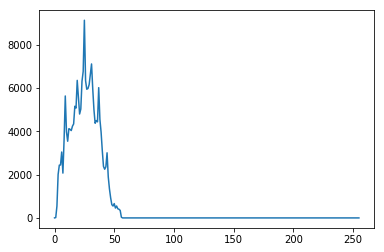

In [38]:
histogram = get_histogram(img_escuro, 256)

x = range(len(histogram))
y = histogram

plt.plot(x, y)

## Transformações Lineares

Vimos que algumas transformações são realizadas a partir da aplicação de funções lineares. Para começar, vamos aplicar novamente a transformação linear do negativo à imagem da Daenarys. Essa transformação é na forma $g(x,y) = - 1 * f(x, y) + 255$, onde $f(x,y)$ é o valor do pixel e $g(x, y)$ é o novo valor do pixel após a transformação. 

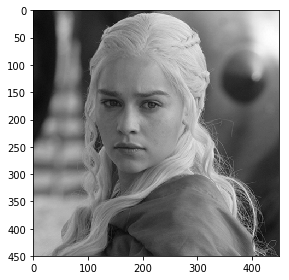

In [73]:
gray_image = Image.open('../images/daenarys_color.jpg').convert("L")
gray_image = np.asarray(gray_image)

io.imshow(gray_image)

In [74]:
nova_imagem = np.uint8((-1*gray_image + 255))

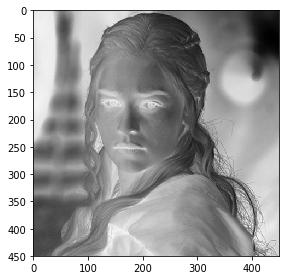

In [75]:
io.imshow(nova_imagem)

Essa transformação linear do negativo, mapeia os pixels do intervalo (0, 255) para o intervalo (255, 0). No entanto, como foi visto em sala de aula, podemos mapear os valores para intervalos pré-definidos. Vamos construir um método que recebe como parâmetro uma imagem juntamente com os valores de $g_{min}$ e $g_{max}$ e retorna a imagem passada como parâmetro mapeada para o intervalo determinado $(g_{min},g_{max})$.

In [76]:
def transformacao_linear(imagem, g_min, g_max):
    
    # Seleciona os valores max e min de pixel da imagem original
    f_min = min(imagem.flatten())
    f_max = max(imagem.flatten())
    
    # Calculo de a 
    a = (g_max - g_min) / (f_max - f_min)
    b = g_min
    
    imagem = imagem - f_min
    
    nova_imagem = (a*imagem) + b
    
    return np.uint8(nova_imagem)

Vamos aplicar a transformação linear à imagem **img_contraste**. Após a aplicação vamos gerar os histogramas para cada imagem e compara-los. 

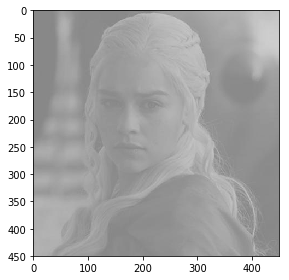

In [77]:
img_contraste = Image.open('../images/histograma/daenarys_contraste.jpg')
img_contraste = np.asarray(img_contraste)
io.imshow(img_contraste)

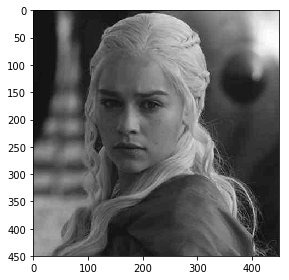

In [78]:
nova_imagem = transformacao_linear(img_contraste, 0, 255)
io.imshow(nova_imagem)

<Figure size 432x288 with 0 Axes>

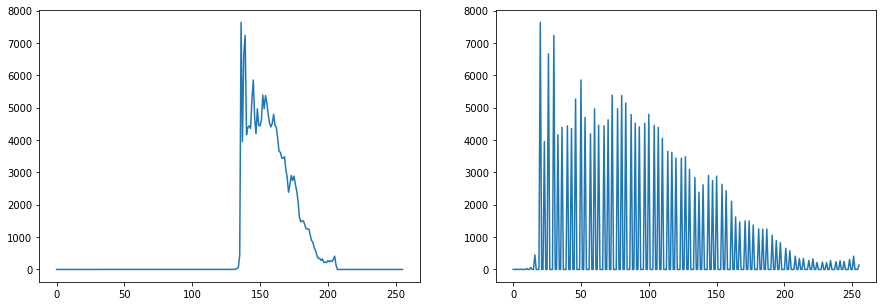

In [79]:
histogram_contraste = get_histogram(img_contraste, 256)

x_contraste = range(len(histogram_contraste))
y_contraste = histogram_contraste

histogram_nova = get_histogram(nova_imagem, 256)

x_nova = range(len(histogram_nova))
y_nova = histogram_nova

plt.clf()
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_contraste, y_contraste)
plt.subplot(122)
plt.plot(x_nova, y_nova)

Vamos aplicar a mesma transformação para a imagem da **daenarys_escuro**

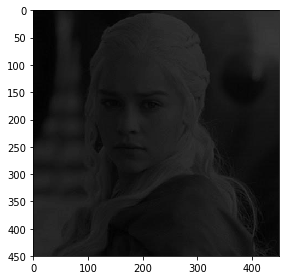

In [81]:
img_escuro = Image.open('../images/histograma/daenarys_escuro.jpeg')
img_escuro = np.asarray(img_escuro)
io.imshow(img_escuro)

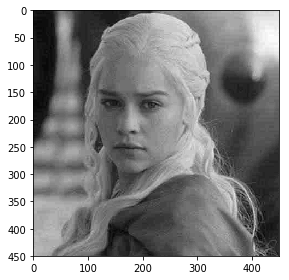

In [82]:
nova_imagem = transformacao_linear(img_escuro, 0, 255)

io.imshow(nova_imagem)

### Transformações Não-Lineares

Como foi visto, as transformações lineares modificam cada pixel a partir de um fator constante, independente do nível de cinza. No entanto, nem sempre isso é interessante. Quando queremos clarear uma imagem, os pixels que já são claros devem ser modificados com menor intensidade do que aqueles que são escuros. Do mesmo jeito, quando queremos escurecer uma imagem, os pixels escuros devem ser escurecidos em proporção menor do que os pixels claros. Esse tipo de ajuste é possível a partir das **transformações lineares**. Desta forma, vamos implementar os métodos **funcao_log** e **funcao_potencia** apresentados nos slides.


In [94]:
import math

def funcao_log(v_pixel, c):
    
    novo_pixel = c * math.log(1+v_pixel)
    
    return novo_pixel

    
def aplicar_log(imagem, valor_c):
    
    tamanho_imagem = imagem.shape
    
    M = tamanho_imagem[0]
    N = tamanho_imagem[1]
    
    novaimagem = np.zeros((M, N))
    
    for i in range(0, M):
        for j in range(0, N):
            novaimagem[i, j] = funcao_log(imagem[i, j], valor_c)
            
    return novaimagem
  

Vamos aplicar a transformação não-linear logaritmica para a imagem da **daenarys_escuro**.

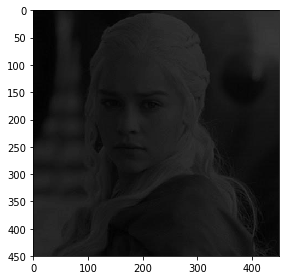

In [95]:
# Carregando a imagem
img_escuro = Image.open('../images/histograma/daenarys_escuro.jpeg')
img_escuro = np.asarray(img_escuro)
io.imshow(img_escuro)

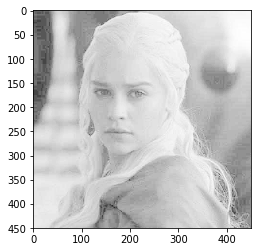

In [114]:
nova_imagem = aplicar_log(img_escuro, 1)

imshow(nova_imagem, cmap='gray')

Agora vamos trabalhar com a função potência

In [98]:
def funcao_potencia(v_pixel, c, gama):
    
    novo_pixel = c * math.pow(v_pixel, gama)
    
    return novo_pixel
    
def aplicar_potencia(imagem, valor_c, valor_gama):
    
    tamanho_imagem = imagem.shape
    
    M = tamanho_imagem[0]
    N = tamanho_imagem[1]
    
    novaimagem = np.zeros((M, N))
    
    for i in range(0, M):
        for j in range(0, N):
            novaimagem[i, j] = funcao_potencia(imagem[i, j], valor_c, valor_gama)
    
    return novaimagem

Vamos agora aplicar a função potência às imagens  a seguir.

### Imagem 1

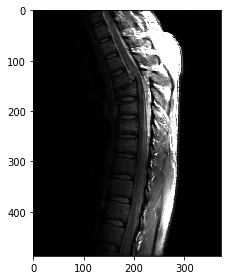

In [100]:
# Carregando a imagem
imagem1 = Image.open('../images/transformacaonaolinear/imagem1.jpg')
imagem1 = np.asarray(imagem1)

io.imshow(imagem1)

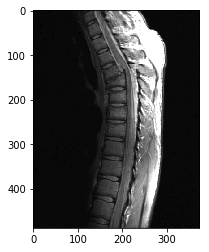

In [108]:
nova_imagem_1 = aplicar_potencia(imagem1, 1, 0.6)
imshow(nova_imagem_1, cmap='gray')

### Imagem 2

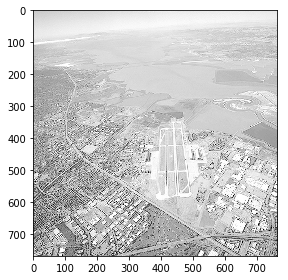

In [109]:
# Carregando a imagem
imagem2 = Image.open('../images/transformacaonaolinear/imagem2.jpg')
imagem2 = np.asarray(imagem2)

io.imshow(imagem2)

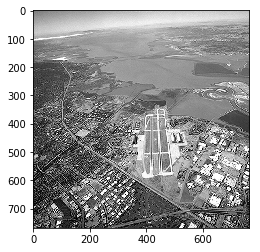

In [113]:
nova_imagem_2 = aplicar_potencia(imagem2, 1, 3.0)
imshow(nova_imagem_2, cmap='gray')